In [1]:
from Bio.Blast import NCBIXML
from os import listdir
import pandas as pd

def edit_xmltype(path):
    edit = open(path).read().replace("BlastOutput2","BlastXML2")
    open(path,"w").write(edit)

def find_mutations(hsp):
    hsp_mutations = []
    start = hsp.sbjct_start
    for i, (q, s) in enumerate(zip(hsp.query,hsp.sbjct)):
        if q.lower() != s.lower():
            hsp_mutations.append([s,start+i,q])
    return hsp_mutations

pct_identities = []
df = pd.DataFrame(columns=["file","protein","mutations"])
files = listdir("./BLAST_OUT/XML/")[1:]
for i,xml_filename in enumerate(files):
    print(f"Progress: {100*i/len(files):.2f}%",end="\r")
    path_fmt = f"./BLAST_OUT/XML/{xml_filename}"
    edit_xmltype(path_fmt)
    record = NCBIXML.read(open(path_fmt))
    for description,alignment in zip(record.descriptions,record.alignments):
        record_mutations = []
        for hsp in alignment.hsps:
            pct_identity = hsp.identities/hsp.align_length
            pct_identities.append(pct_identity)
            if pct_identity >= 0.95 and pct_identity < 1:
                record_mutations.extend(find_mutations(hsp))
        df.loc[len(df),:] = [xml_filename,description.title,record_mutations]
df["n_mutations"] = df.mutations.apply(lambda x: len(x))

C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


In [2]:
df.sort_values(by="n_mutations",ascending=False)

,file,protein,mutations,n_mutations
260,BLAST_171.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[Q, 173, H], [T, 307, P], [D, 614, G], [Q, 67...",41
263,BLAST_172.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[P, 225, S], [L, 229, F], [I, 231, L], [G, 79...",20
226,BLAST_161.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 575, G], [Q, 580, R], [S, 605, F], [S, 87...",16
229,BLAST_162.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[Q, 14, H], [K, 529, N], [S, 530, F], [T, 531...",15
238,BLAST_165.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[K, 77, N], [F, 106, L], [Q, 115, H], [V, 130...",14
...,...,...,...,...
255,BLAST_17.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0
256,BLAST_17.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0
258,BLAST_170.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0
259,BLAST_170.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0


In [3]:
from itertools import chain
protein_df = pd.DataFrame(df.groupby("protein").n_mutations.sum()).sort_values(by="n_mutations",ascending=False)
protein_df["mutations"] = None
for i,protein in enumerate(protein_df.index):
    protein_mutations = []
    protein_rows = df.loc[df.protein == protein,"mutations"]
    for row in protein_rows:
        protein_mutations.extend(row)
    protein_mutations = ["".join([str(i) for i in protein_mutation]) for protein_mutation in protein_mutations]
    protein_mutations = list(set(protein_mutations))
    protein_df.loc[protein,:] = [protein_df.loc[protein,"n_mutations"],protein_mutations]
protein_df["n_unique_mutations"] = protein_df.mutations.apply(lambda x: len(x))
protein_df["shorthand"] = [i.split(";")[-2] for i in protein_df.index]
protein_df

C:\Users\Ryan\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,n_mutations,mutations,n_unique_mutations,shorthand
protein,,,,
cds-YP_009724390.1; gene-GU280_gp02; Genbank:YP_009724390.1; YP_009724390.1; structural protein; spike protein; CDS; S; GU280_gp02; surface glycoprotein; YP_009724390.1,277,"[T22I, S803P, I794V, Y741S, N394K, I569N, G798...",210,surface glycoprotein
cds-YP_009724397.2; gene-GU280_gp10; Genbank:YP_009724397.2; YP_009724397.2; ORF9; structural protein; CDS; N; GU280_gp10; nucleocapsid phosphoprotein; YP_009724397.2,11,"[M210I, P326L, G204r, A211V, S187l, S202n, R203k]",7,nucleocapsid phosphoprotein
cds-YP_009724396.1; gene-GU280_gp09; Genbank:YP_009724396.1; YP_009724396.1; CDS; ORF8; GU280_gp09; ORF8 protein; YP_009724396.1,9,[L84S],1,ORF8 protein
cds-YP_009724389.1; gene-GU280_gp01; Genbank:YP_009724389.1; YP_009724389.1; pp1ab; translated by -1 ribosomal frameshift; ribosomal slippage; CDS; ORF1ab; GU280_gp01; ORF1ab polyprotein; YP_009724389.1,7,"[K1571N, P314L, V1642D, A1603T, V1615D, L1542V]",6,ORF1ab polyprotein
cds-YP_009725295.1; gene-GU280_gp01; Genbank:YP_009725295.1; YP_009725295.1; pp1a; CDS; ORF1ab; GU280_gp01; ORF1a polyprotein; YP_009725295.1,4,"[T78X, C4330R]",2,ORF1a polyprotein
cds-YP_009724393.1; gene-GU280_gp05; Genbank:YP_009724393.1; YP_009724393.1; ORF5; structural protein; CDS; M; GU280_gp05; membrane glycoprotein; YP_009724393.1,2,"[G89R, L57V]",2,membrane glycoprotein
cds-YP_009724394.1; gene-GU280_gp06; Genbank:YP_009724394.1; YP_009724394.1; CDS; ORF6; GU280_gp06; ORF6 protein; YP_009724394.1,1,[E46V],1,ORF6 protein
cds-YP_009724391.1; gene-GU280_gp03; Genbank:YP_009724391.1; YP_009724391.1; CDS; ORF3a; GU280_gp03; ORF3a protein; YP_009724391.1,0,[],0,ORF3a protein
cds-YP_009724392.1; gene-GU280_gp04; Genbank:YP_009724392.1; YP_009724392.1; ORF4; structural protein; E protein; CDS; E; GU280_gp04; envelope protein; YP_009724392.1,0,[],0,envelope protein


<AxesSubplot:ylabel='Count'>

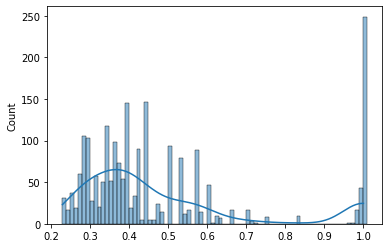

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
sns.histplot(pct_identities,kde=True,binwidth=0.01,ax=ax)

In [5]:
outfile = "./mutation_list.csv"

with open(outfile,"w") as f:
    f.write("PROTEIN,AA1LOCATIONAA2\n")
    for i,row in protein_df.iterrows():
        for mutation in row.mutations:
            f.write(row.shorthand.strip() + "," + mutation +"\n")

In [6]:
mutations_df = pd.DataFrame(columns=["file","protein","aa1","location","aa2","mutation_shorthand"])

protein_counts = {}
files = listdir("./BLAST_OUT/XML/")[1:]
for i,xml_filename in enumerate(files):
    print(f"Progress: {100*i/len(files):.2f}%",end="\r")
    path_fmt = f"./BLAST_OUT/XML/{xml_filename}"
    edit_xmltype(path_fmt)
    record = NCBIXML.read(open(path_fmt))
    for description,alignment in zip(record.descriptions,record.alignments):
        protein_name = description.title.split(";")[-2].strip()
        try:
            protein_counts[protein_name] += 1
        except:
            protein_counts[protein_name] = 1
        for hsp in alignment.hsps:
            pct_identity = hsp.identities/hsp.align_length
            if pct_identity >= 0.95 and pct_identity < 1:
                for mutation in find_mutations(hsp):
                    mutations_df.loc[len(mutations_df),:] = [xml_filename,protein_name,*mutation,"".join([str(i) for i in mutation])]
mutations_df

,file,protein,aa1,location,aa2,mutation_shorthand
0,BLAST_107.xml,surface glycoprotein,D,614,G,D614G
1,BLAST_110.xml,surface glycoprotein,G,496,D,G496D
2,BLAST_110.xml,surface glycoprotein,D,614,G,D614G
3,BLAST_125.xml,ORF8 protein,L,84,S,L84S
4,BLAST_130.xml,surface glycoprotein,D,614,G,D614G
...,...,...,...,...,...,...
306,BLAST_90.xml,ORF8 protein,L,84,S,L84S
307,BLAST_92.xml,ORF8 protein,L,84,S,L84S
308,BLAST_93.xml,ORF8 protein,L,84,S,L84S
309,BLAST_94.xml,ORF8 protein,L,84,S,L84S


In [7]:
mutation_freqs_df = pd.DataFrame()
mutation_freqs_df["mutation_shorthand"] = mutations_df.mutation_shorthand.unique()
mutation_freqs_df["aa1"] = mutation_freqs_df.mutation_shorthand.apply(lambda x: x[0])
mutation_freqs_df["aa2"] = mutation_freqs_df.mutation_shorthand.apply(lambda x: x[-1])
mutation_freqs_df["location"] = mutation_freqs_df.mutation_shorthand.apply(lambda x: x[1:-1])
for protein in protein_counts:
    mutation_freqs_df[protein] = None
    protein_df_ = mutations_df.loc[mutations_df.protein == protein,:]
    for i, row in mutation_freqs_df.iterrows():
        protein_mutation_df_ = protein_df_.loc[protein_df_.mutation_shorthand == row.mutation_shorthand,:]
        mutation_freqs_df.loc[i,protein] = len(protein_mutation_df_)/protein_counts[protein]
mutation_freqs_df = mutation_freqs_df.drop(columns=[column for column in mutation_freqs_df.columns[4:] if sum(mutation_freqs_df[column]) == 0])

In [8]:
mutation_freqs_df

,mutation_shorthand,aa1,aa2,location,ORF1ab polyprotein,surface glycoprotein,ORF1a polyprotein,nucleocapsid phosphoprotein,membrane glycoprotein,ORF8 protein,ORF6 protein
0,D614G,D,G,614,0.0,0.131148,0.0,0.000000,0.000000,0.00,0.0
1,G496D,G,D,496,0.0,0.005464,0.0,0.000000,0.000000,0.00,0.0
2,L84S,L,S,84,0.0,0.000000,0.0,0.000000,0.000000,0.36,0.0
3,E1144Q,E,Q,1144,0.0,0.005464,0.0,0.000000,0.000000,0.00,0.0
4,R203k,R,k,203,0.0,0.000000,0.0,0.056604,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
224,L57V,L,V,57,0.0,0.000000,0.0,0.000000,0.071429,0.00,0.0
225,G89R,G,R,89,0.0,0.000000,0.0,0.000000,0.071429,0.00,0.0
226,E46V,E,V,46,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.5
227,A701V,A,V,701,0.0,0.005464,0.0,0.000000,0.000000,0.00,0.0


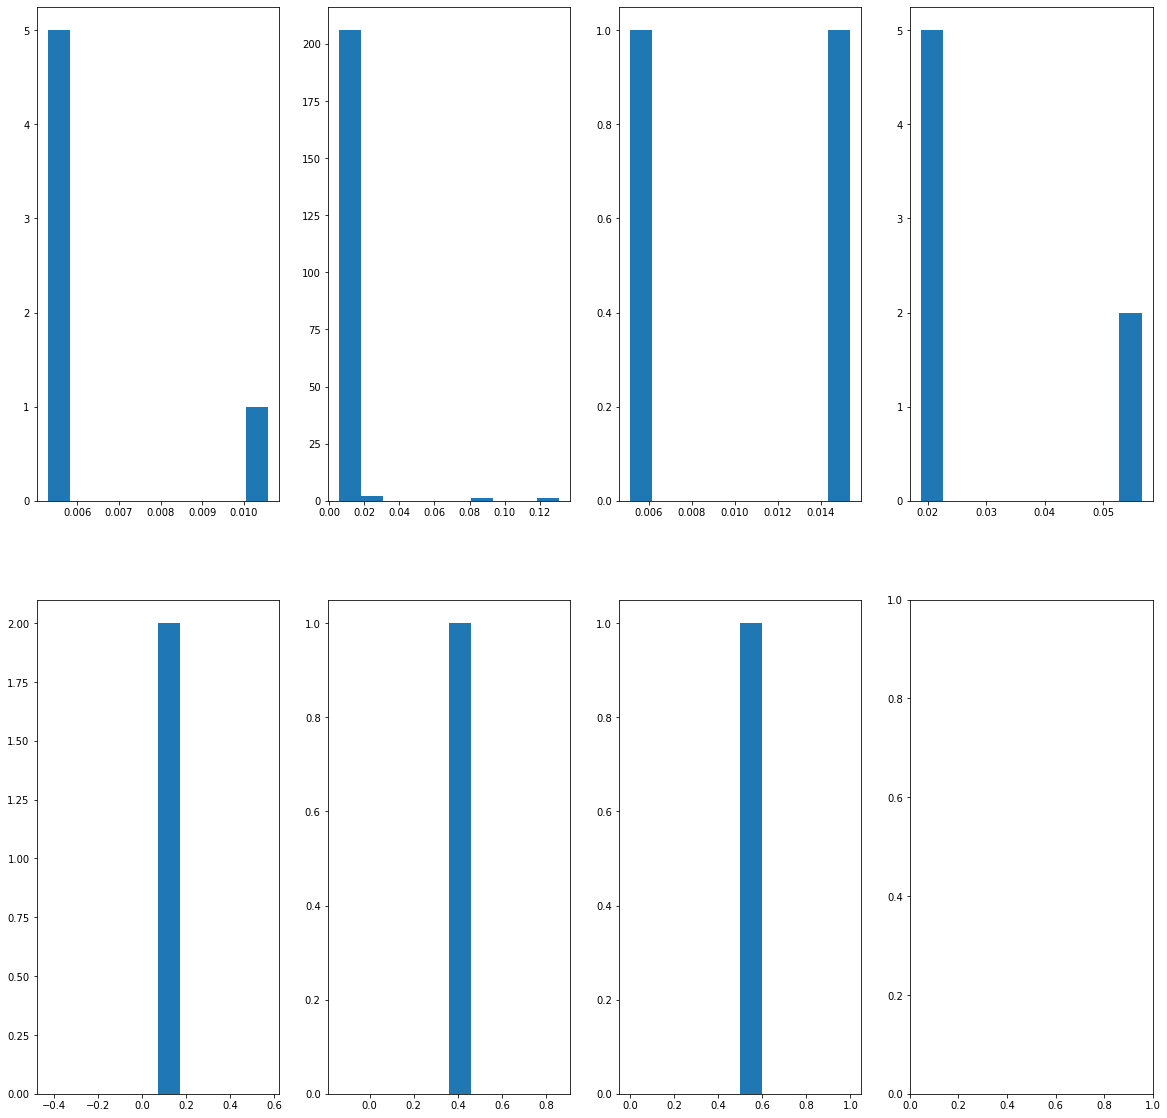

In [9]:
fig, axes = plt.subplots(2,4,figsize=(20,20))
for protein,ax in zip(mutation_freqs_df.columns[4:],axes.flatten()):
    ax.hist(mutation_freqs_df.loc[mutation_freqs_df[protein] > 0,protein])

In [10]:
for protein in mutation_freqs_df.columns[4:]:
    protein_mutation_freqs_df = mutation_freqs_df.loc[mutation_freqs_df[protein] > 0,[*mutation_freqs_df.columns[:4],protein]]
    if len(protein_mutation_freqs_df) > 0:
        display(protein_mutation_freqs_df)
        protein_mutation_freqs_df.to_csv(f"{protein}_freqs.csv")

,mutation_shorthand,aa1,aa2,location,ORF1ab polyprotein
182,L1542V,L,V,1542,0.005291
183,K1571N,K,N,1571,0.005291
184,A1603T,A,T,1603,0.005291
185,V1615D,V,D,1615,0.005291
186,V1642D,V,D,1642,0.005291
222,P314L,P,L,314,0.010582


,mutation_shorthand,aa1,aa2,location,surface glycoprotein
0,D614G,D,G,614,0.131148
1,G496D,G,D,496,0.005464
3,E1144Q,E,Q,1144,0.005464
6,C291G,C,G,291,0.010929
7,C391G,C,G,391,0.010929
...,...,...,...,...,...
217,S1252f,S,f,1252,0.005464
218,S50L,S,L,50,0.005464
219,T323K,T,K,323,0.005464
223,A829T,A,T,829,0.092896


,mutation_shorthand,aa1,aa2,location,ORF1a polyprotein
13,T78X,T,X,78,0.015385
221,C4330R,C,R,4330,0.005128


,mutation_shorthand,aa1,aa2,location,nucleocapsid phosphoprotein
4,R203k,R,k,203,0.056604
5,G204r,G,r,204,0.056604
187,M210I,M,I,210,0.018868
188,A211V,A,V,211,0.018868
189,P326L,P,L,326,0.018868
220,S202n,S,n,202,0.018868
228,S187l,S,l,187,0.018868


,mutation_shorthand,aa1,aa2,location,membrane glycoprotein
224,L57V,L,V,57,0.071429
225,G89R,G,R,89,0.071429


,mutation_shorthand,aa1,aa2,location,ORF8 protein
2,L84S,L,S,84,0.36


,mutation_shorthand,aa1,aa2,location,ORF6 protein
226,E46V,E,V,46,0.5


In [19]:
spike_df = mutation_freqs_df.loc[mutation_freqs_df["surface glycoprotein"] > 0, [*mutation_freqs_df.columns[:4],"surface glycoprotein"]]
spike_df.location = spike_df.location.apply(lambda x: int(x))

,mutation_shorthand,aa1,aa2,location,surface glycoprotein
0,D614G,D,G,614,0.131148
1,G496D,G,D,496,0.005464
3,E1144Q,E,Q,1144,0.005464
6,C291G,C,G,291,0.010929
7,C391G,C,G,391,0.010929
...,...,...,...,...,...
217,S1252f,S,f,1252,0.005464
218,S50L,S,L,50,0.005464
219,T323K,T,K,323,0.005464
223,A829T,A,T,829,0.092896


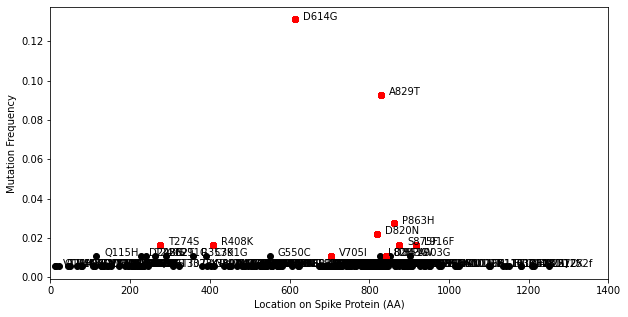

In [15]:
fig, ax = plt.subplots()
ax.scatter(spike_df.location,spike_df["surface glycoprotein"],color="black")
ax.set_xlim(0,1400)
ax.set_xlabel("Location on Spike Protein (AA)")
ax.set_ylabel("Mutation Frequency")
top_muts = spike_df.sort_values(by="surface glycoprotein",ascending=False)
for i,row in top_muts.iterrows():
    plt.text(row.location + 20,row["surface glycoprotein"],row.mutation_shorthand)
    ax.scatter(top_muts.head(10).location,top_muts.head(10)["surface glycoprotein"],color="red")
plt.show()

,mutation_shorthand,aa1,aa2,location,mut_frequency
0,D614G,D,G,614,0.131148
223,A829T,A,T,829,0.092896
78,P863H,P,H,863,0.027322
161,D820N,D,N,820,0.021858
10,T274S,T,S,274,0.016393
...,...,...,...,...,...
85,S975N,S,N,975,0.005464
86,V130A,V,A,130,0.005464
87,F194Y,F,Y,194,0.005464
88,N196D,N,D,196,0.005464


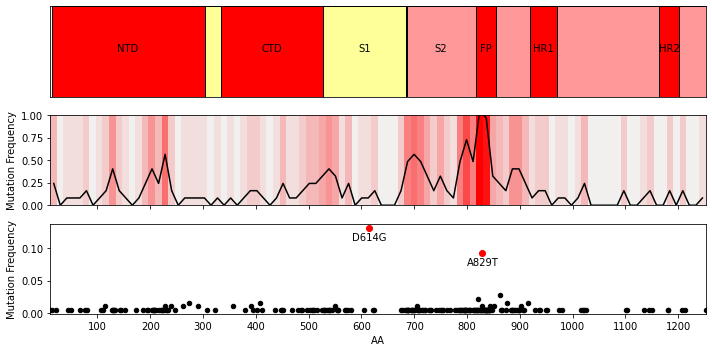

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
plt.rcParams["figure.figsize"] = 10,5

top_muts.rename(columns={"surface glycoprotein":"mut_frequency"},inplace=True)
display(top_muts)
x = top_muts.location.values
y = top_muts.mut_frequency.values
y_ = pd.cut(top_muts.location,bins=100).value_counts(sort=False).values

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=True)
extent = [min(top_muts.location),max(top_muts.location),0,1]
cmap = sns.light_palette("Red",as_cmap=True)
ax2.imshow(y_[np.newaxis,:], cmap=cmap, aspect="auto", extent=extent)
sns.histplot(top_muts.location,ax=ax2,bins=100,color="k",stat="frequency",fill=False,element="poly")
ax2.set_facecolor((0,0,0,0))
ax2.set_ylim(0,1)
ax2.set_ylabel("Mutation Frequency")

ax3.scatter(x,y,c="k",s=20)
ax3.set_xticks([i*100 for i in range(13)])
ax3.set_ylabel("Mutation Frequency")
ax3.set_xlabel("AA")
sort_ = top_muts.sort_values(by="mut_frequency",ascending=False).head(2)
for i,row in sort_.iterrows():
    plt.text(row.location,row.mut_frequency - 0.02,row.mutation_shorthand,ha="center")
ax3.scatter(sort_.location,sort_.mut_frequency,color="r")

ax.set_xlim(extent[0],extent[1])
ax.set_ylim(extent[2],extent[3])
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

ax.add_patch(patches.Rectangle((13,0),672,1,facecolor="#FFFF99",label="S2",edgecolor="k"))
ax.text(606,0.5,"S1",ha="center")
ax.add_patch(patches.Rectangle((686,0),587,1,facecolor="#FF9999",label="S1",edgecolor="k"))
ax.text(751,0.5,"S2",ha="center")

highlight_regions = [[13,303,"NTD"],[334,527,"CTD"],[816,855,"FP"],[920,970,"HR1"],[1163,1202,"HR2"]]
for highlight_region in highlight_regions:
    start,end,lbl = highlight_region
    patch = ax.add_patch(patches.Rectangle((start,0),end-start,1,facecolor="red",label=lbl,edgecolor="k"))
    centerx = start+(end-start)/2
    centery = 0.5
    ax.text(centerx,centery,lbl,ha="center")

plt.tight_layout()
plt.savefig("./multipanel.png",dpi=600)